In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

RuntimeError: 'ipympl is not a recognised GUI loop or backend name

# l'ensemble de Mandelbrot

il s'agit de calculer l'image de la convergence de mandelbrot:

<img src="media/mandelbrot.svg">

## comment ça marche ?

* dans l'espace complexe, on définit pour chaque $c\in\mathbb{C}$ la suite
   * $z_0 = c$
   * $z_{n+1} = z_n^2 + c$
* on démontre que 
  * lorsque $|z_n|>2$, la suite diverge

il s'agit pour nous de 

* partir d'un pavé rectangulaire  
  par exemple sur la figure, on a pris l'habituel  
  $re \in [-2, 0.8]$ et  $im \in [-1.4, 1.4]$
* découper ce pavé en un maillage de $w \times h$ points  
  (sur la figure, 1000 x 1000)
* on se fixe un nombre maximal `max` d'itérations (disons 20)
  * et pour chaque point du maillage, on va calculer si la suite diverge avant `max` itérations
* c'est-à-dire plus spécifiquement on calcule un tableau `diverge` de la taille du maillage
  * pour chaque point `z`, on calcule les `max` premiers termes de la suite
  * et à la première itération `n` où la suite diverge (son module est supérieur à 2)  
    alors on affecte `diverge[z] = n`
* on n'a plus qu'à afficher ensuite l'image obtenue avec `plt.imshow`

*indices*

* pour fabriquer la grille des points de départ, 
  on pourra regarder `np.linspace` et `np.meshgrid`

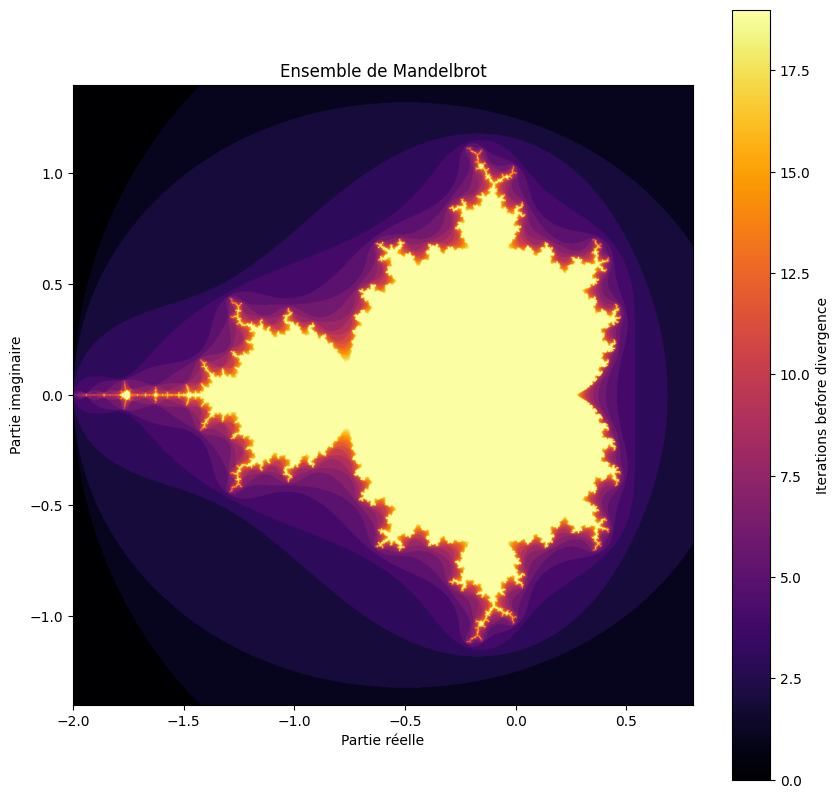

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# à vous de jouer
def mandelbrot(w, h, xlim, ylim, max_iter):
    # Création d'une grille de points complexes
    x = np.linspace(xlim[0], xlim[1], w)
    y = np.linspace(ylim[0], ylim[1], h)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y  # Matrice des nombres complexes
    Z = np.zeros(C.shape, dtype=np.complex128)  # Initialisation de Z
    diverge = np.zeros(C.shape, dtype=int)  # Tableau pour stocker les itérations de divergence
    mask = np.ones(C.shape, dtype=bool)  # Masque pour les points non divergents

    for n in range(max_iter):
        Z[mask] = Z[mask] ** 2 + C[mask]  # Mise à jour de Z
        diverge[mask] = n  # Mise à jour des itérations
        mask[np.abs(Z) > 2] = False  # Mise à jour du masque pour les points divergents

    return diverge

# Paramètres
w, h = 1000, 1000
xlim = [-2, 0.8]
ylim = [-1.4, 1.4]
max_iter = 20

# Calcul de l'ensemble de Mandelbrot
diverge = mandelbrot(w, h, xlim, ylim, max_iter)

# Affichage de l'image
plt.figure(figsize=(10, 10))
plt.imshow(diverge, extent=(xlim[0], xlim[1], ylim[0], ylim[1]), cmap='inferno', origin='lower')
plt.colorbar(label='Iterations before divergence')
plt.title('Ensemble de Mandelbrot')
plt.xlabel('Partie réelle')
plt.ylabel('Partie imaginaire')

# Sauvegarde de l'image en format vectoriel
plt.savefig('mandelbrot.svg', format='svg')

# Afficher l'image
plt.show()

## v2

* on peut passer en paramètre à la fonction
  * le domaine en x et en y
  * le nombre maximum d'itérations
* on veut pouvoir produire une image (pour l'insérer dans l'énoncé par exemple)
  * quels formats sont disponibles ?
  * sauvez votre image dans un format vectoriel
  * affichez cette depuis votre notebook